## Цели проекта

Предлагается поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру.

**Цель проекта** — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

**Задачи проекта**:
- Провести анализ данных
- Выявить наиболее значимые признаки для построения модели
- Дополнительно: построить модель для предсказания результатов госэкзамена по математике для каждого ученика школы
- Дополнительно: провести оценку полученной модели

## Импорт необходимых библиотек

In [2037]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings('ignore')

## Импорт и изучение датасета

В датасете представлены следующие данные:

- school — аббревиатура школы, в которой учится ученик
- sex — пол ученика ('F' - женский, 'M' - мужской)
- age — возраст ученика (от 15 до 22)
- address — тип адреса ученика ('U' - городской, 'R' - за городом)
- famsize — размер семьи('LE3' <= 3, 'GT3' >3)
- Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
- Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
- Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
- Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
- Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
- reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
- guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
- traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
- studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
- failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)
- schoolsup — дополнительная образовательная поддержка (yes или no)
- famsup — семейная образовательная поддержка (yes или no)
- paid — дополнительные платные занятия по математике (yes или no)
- activities — дополнительные внеучебные занятия (yes или no)
- nursery — посещал детский сад (yes или no)
- higher — хочет получить высшее образование (yes или no)
- internet — наличие интернета дома (yes или no)
- romantic — в романтических отношениях (yes или no)
- famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
- freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
- goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
- health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
- absences — количество пропущенных занятий
- score — баллы по госэкзамену по математике
- studytime, granular - загадочный 30й столбец, из соображений логики наверняка как-то связанный со studytime

In [2038]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

df = pd.read_csv('stud_math.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

У нас есть 30 колонок данных, score - целевая переменная. Среди признаков, судя по описанию датасета, у нас есть следующие виды признаков:
- бинарные **(school, sex, address, famsize, Pstatus, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic)**
- категориальные (номинативные): **Mjob,Fjob,reason,guardian**
- категориальные (порядковые): **Medu, Fedu, studytime, failures, traveltime, famrel, freetime, goout, health**
- вещественные (числовые): **age, absences**

Также есть признак **studytime,granular**, смысл которого предстоит понять в процессе анализа.

Для начала посмотрим на число пропусков в каждом признаке.

In [2039]:
df.isna().sum().sort_values(ascending = False)

Pstatus                45
paid                   40
famsup                 39
Fjob                   36
internet               34
romantic               31
guardian               31
traveltime             28
famsize                27
famrel                 27
Fedu                   24
failures               22
higher                 20
Mjob                   19
reason                 17
address                17
nursery                16
health                 15
activities             14
absences               12
freetime               11
schoolsup               9
goout                   8
studytime               7
studytime, granular     7
score                   6
Medu                    3
age                     0
sex                     0
school                  0
dtype: int64

Наибольшее количество пропусков у нас в признаке Pstatus, около 11% строк. Это не так много, ситуация с пропусками выглядит нормально. Как можно заполнить пропуски? Различными статистическими методами или, например, методом k ближайших соседей, но он требует достаточного количеста объектов без пропусков. Посмотрим, сколько строк у нас не содержат пропусков.

In [2040]:
df.dropna(how = 'any').shape

(97, 30)

К сожалению, только 97 строк полностью заполнены, это меньше, чем 25% данных. В различных источниках говорится, что при большом количестве пропусков в объектах метод ближайших соседей работает недостаточно хорошо, поэтому будем заполнять пропуски медианой для числовых признаков и модой для номинативных. Попробуем посмотреть на данные более подробно.

In [2041]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


Сразу посмотрим на значения целевой переменной и количество пропусков.

In [2042]:
df.score.value_counts(dropna = False)

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
45.0     27
70.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
NaN       6
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

У нас всего 6 пропусков в целевой переменной, удалим эти строки.

In [2043]:
df = df.dropna(subset = ['score'])

## Обработка бинарных признаков

Заменим в столбцах, где всего 2 возможных значения, значения на 1 и 0. Для этого напишем функцию и применим к нужным признакам.
- в признаках schoolsup, famsup, paid, activities, nursery, higher, internet, romantic: yes заменим на 1, no - на 0
- в school: GP заменим на 1, MS - на 0
- в sex: заменим F на 1, M - на 0
- в address: заменим U на 1, R - на 0
- в famsize: заменим GT3 на 1, LE3 на 0
- в Pstatus: заменим T на 1, A на 0

In [2044]:
binary_columns = ['school','sex','address','famsize','schoolsup','famsup','paid','activities',
                  'Pstatus','nursery','higher','internet','romantic']

one_values = ['yes','GP','F','U','GT3','T']
zero_values = ['no','MS','M','R','LE3','A']

def convert_to_binary(value):
    if value in one_values:
        return 1
    elif value in zero_values:
        return 0
    else: 
        return value

# функция для нахождения значимых различий для признака по тесту Стьюдента
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

# функция отрисовки боксплота для конкретной колонки
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [2045]:
for col in binary_columns:
    df[col] = df[col].apply(convert_to_binary)

Теперь заполним все пропуски медианным значением и посмотрим на распределение значений признаков.

In [2046]:
for col in binary_columns:
    median = df[col].median()
    df[col] =df[col].apply(lambda x: x if x == x else median)

In [2047]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,1,1,18,1.0,1.0,0.0,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,-6.0,1.0,1.0,0.0,4.0,3.0,4.0,3.0,6.0,30.0
1,1,1,17,1.0,1.0,1.0,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,-6.0,1.0,1.0,0.0,5.0,3.0,3.0,3.0,4.0,30.0
2,1,1,15,1.0,0.0,1.0,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,1.0,0.0,0.0,0.0,1.0,-6.0,1.0,1.0,0.0,4.0,3.0,2.0,3.0,10.0,50.0
3,1,1,15,1.0,1.0,1.0,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,-9.0,1.0,1.0,1.0,3.0,2.0,2.0,5.0,2.0,75.0
4,1,1,16,1.0,1.0,1.0,3.0,3.0,other,other,home,father,1.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,-6.0,1.0,0.0,0.0,4.0,3.0,2.0,5.0,4.0,50.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EDA749F948>,
      dtype=object)

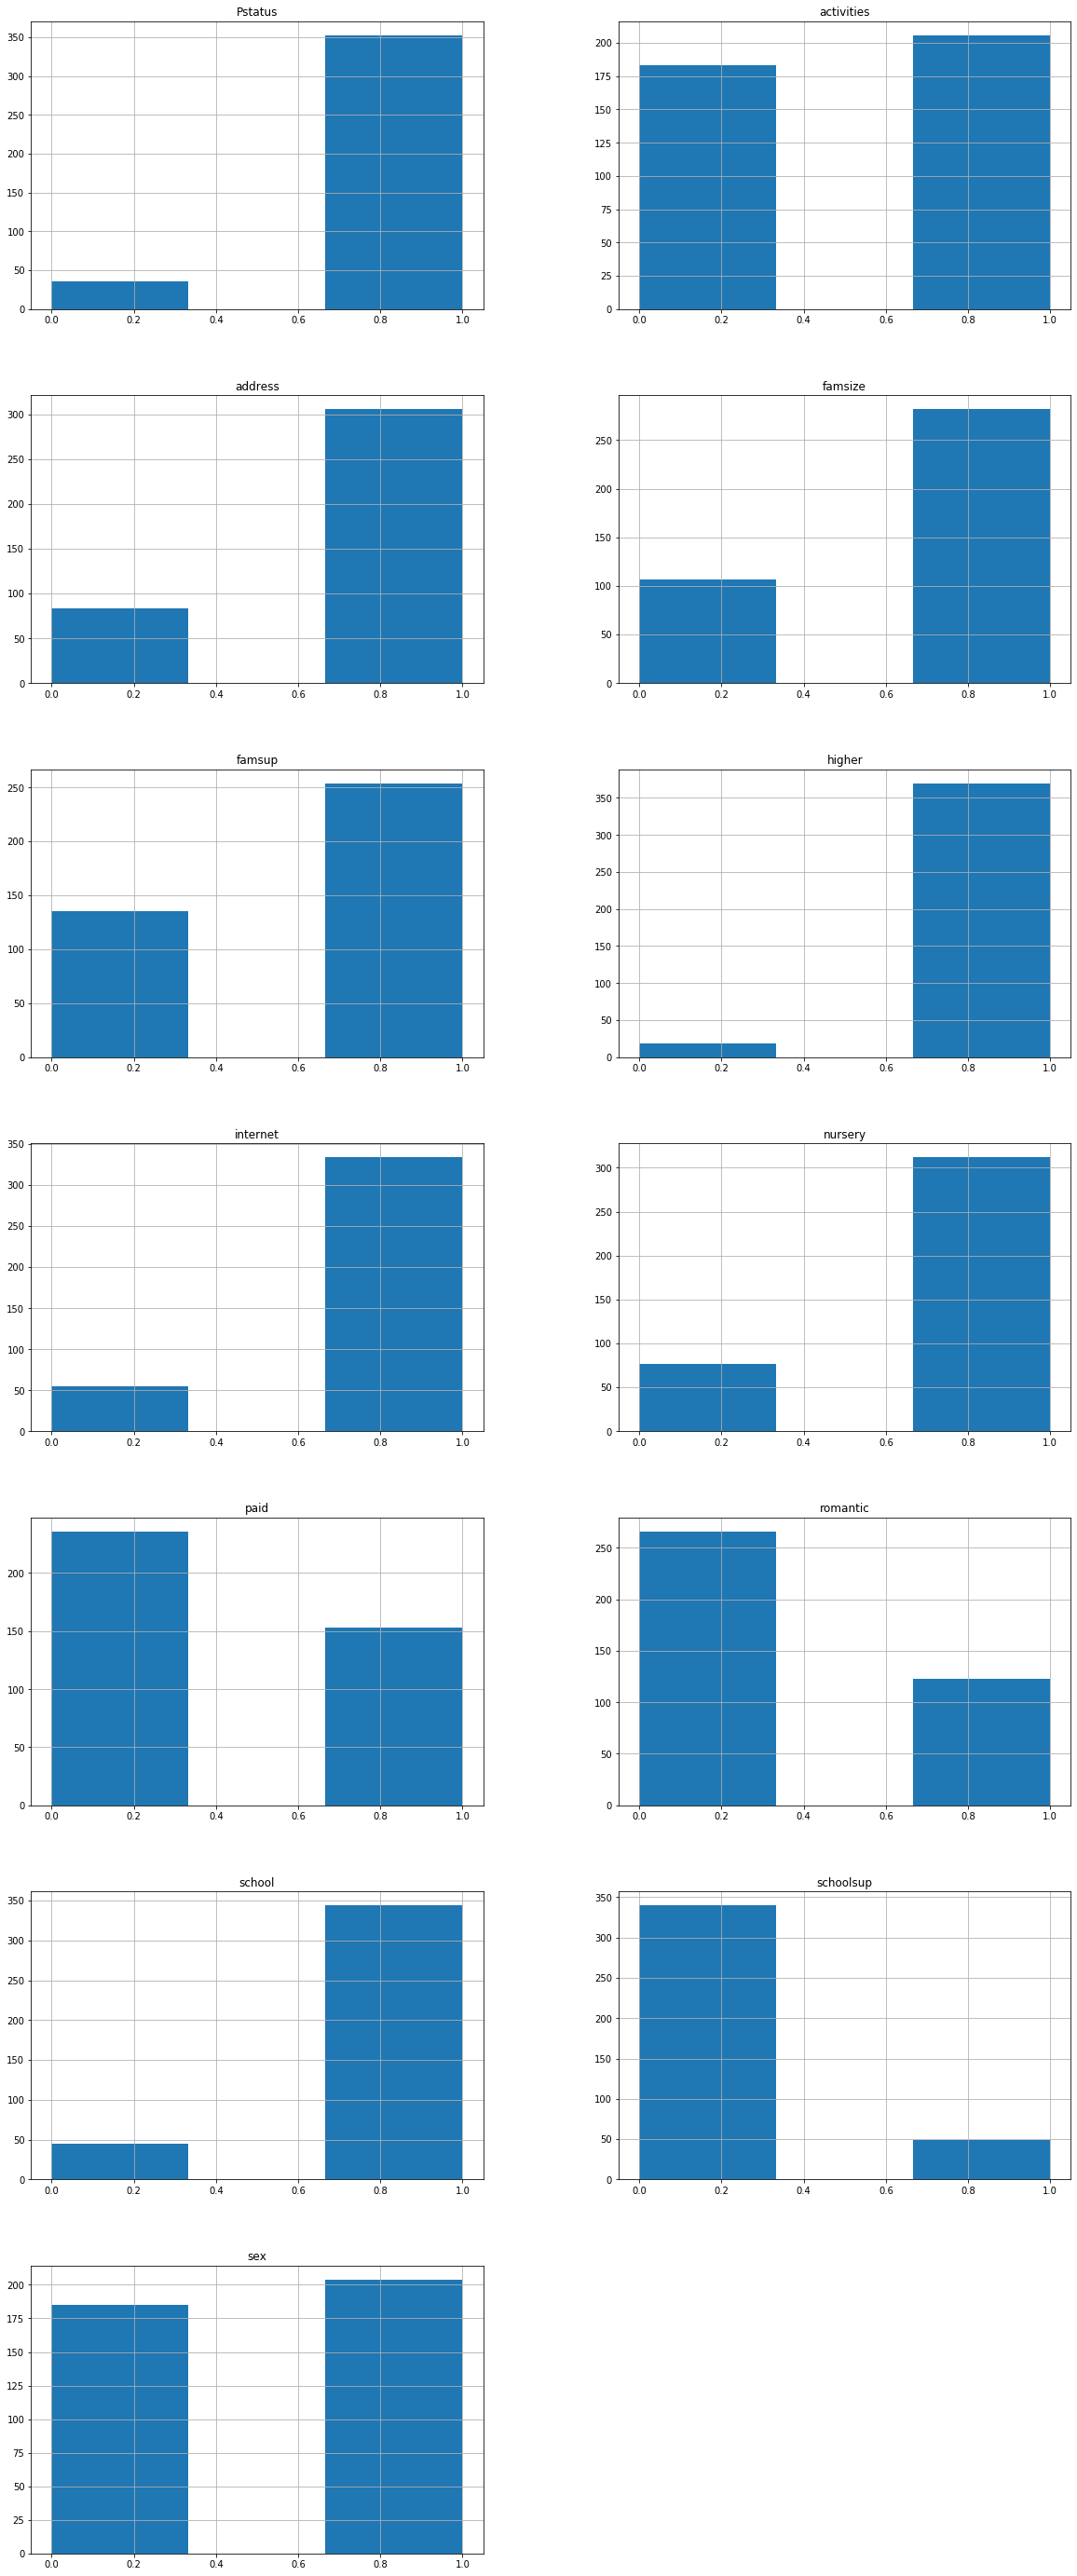

In [2048]:
df[binary_columns].hist(layout = (7,2),figsize = (20,50),bins = 3)

Из распределений видно, что почти во всех бинарных столбцах (кроме activities, paid, sex) наблюдается очень сильный перекос в данных. Посмотрим на значимость признаков чуть позже, после анализа всех признаков.

## Обработка номинативных категориальных признаков

Номинативных категориальных признака у нас всего 4 - Mjob,Fjob,reason,guardian. Для каждого из них посмотрим на данные, заполним пропуски модой, после чего посмотрим на распределение значений с помощью боксплота. Чуть позже в качестве теста на значимость признака применим тест Стьюдента.

In [2049]:
nominative_columns = ['Mjob','Fjob','reason','guardian']

for col in nominative_columns:
    display(df[col].value_counts(dropna = False))

other       127
services     98
at_home      58
teacher      55
health       32
NaN          19
Name: Mjob, dtype: int64

other       194
services     99
NaN          36
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

course        135
reputation    102
home          101
other          34
NaN            17
Name: reason, dtype: int64

mother    248
father     86
NaN        31
other      24
Name: guardian, dtype: int64

Пропусков в наших данных не так много, но и самих данных не так много, так что заменим все пропуски на моду признака и посмотрим на боксплоты.

In [2050]:
for col in nominative_columns:
    mode = df[col].mode()[0]
    df[col] = df[col].apply(lambda x: x if x == x else mode)

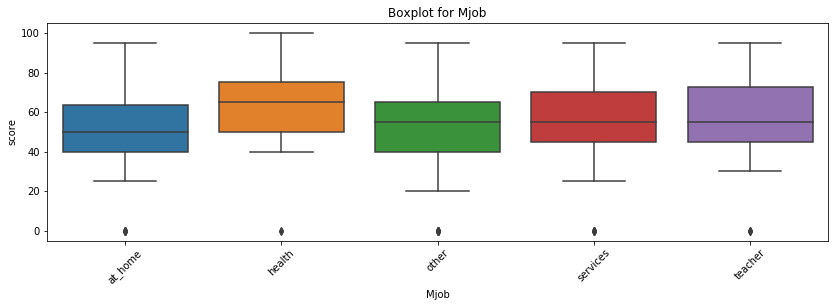

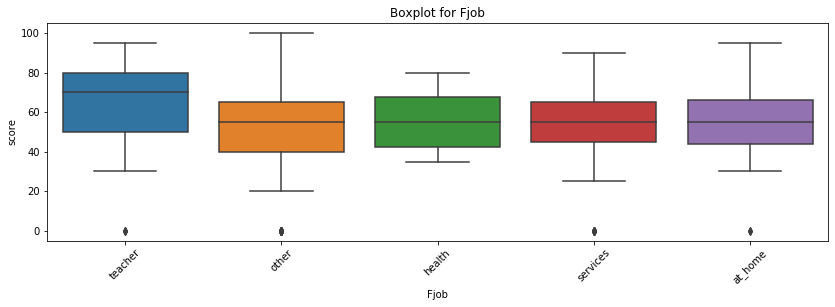

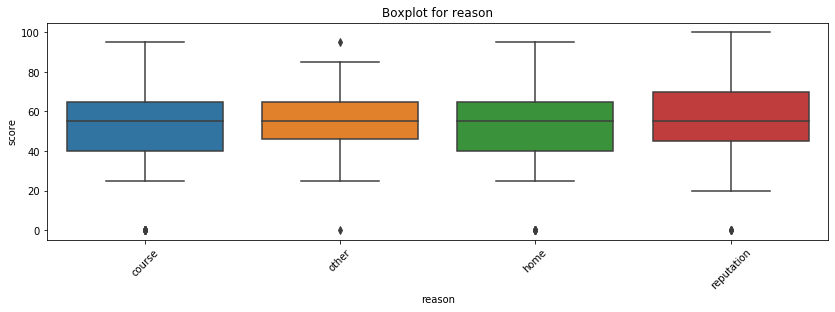

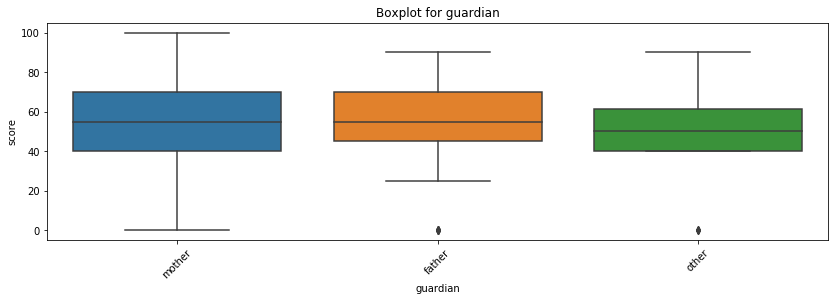

In [2051]:
for col in nominative_columns:
    get_boxplot(col)

На первый взгляд, какую-то значимость имеют признаки Mjob и Fjob. Также чуть позже проверим признаки по тесту Стьюдента.

## Обработка вещественных (числовых) признаков

У нас всего 2 вещественных признака - age, absences, а также целевая переменная score. Посмотрим поподробнее на их данные.

### Столбец age

Описание: возраст ученика (от 15 до 22).

In [2052]:
n_age = len(df.age.value_counts(dropna = False)) # число столбцов для гистограммы распределения
df.age.value_counts()

16    103
17     98
15     82
18     80
19     21
20      3
22      1
21      1
Name: age, dtype: int64

В данном столбце нет пропусков, посмотрим на его распределение.

count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

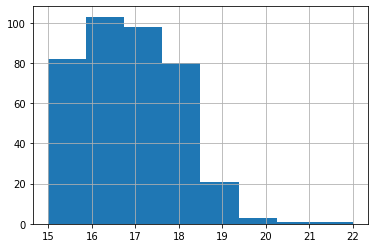

In [2053]:
df.age.hist(bins = n_age)
df.age.describe()

Видно, что основная масса значений сгруппирована около 16-17 лет, меньше всего значений от 20 и более лет. Распределение похоже на нормальное со смещением. Проверим столбец на выбросы.

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


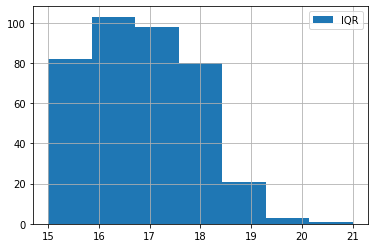

In [2054]:
def check_for_outliers(column,bins_number):    
    median = df[column].median()
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
    perc25 = df[column].quantile(0.25)
    perc75 = df[column].quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
          , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
    df[column].loc[df[column].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = bins_number,label = 'IQR')
    plt.legend();

check_for_outliers('age',n_age - 1)

Судя по формуле, единственное значение 22 в данных столбца - это выброс. Но если мы его отфильтруем, то совсем не учтем учеников в возрасте 22 лет, тем более, что 22 - входит в область определения из описания признака. В таком случае оставим это значение.

### Столбец absences

Описание: количество пропущенных занятий. Посмотрим на наши данные.

In [2055]:
df.absences.value_counts(dropna = False)

0.0      110
2.0       60
4.0       52
6.0       30
8.0       20
10.0      17
12.0      12
14.0      12
NaN       11
16.0       7
3.0        7
7.0        6
5.0        5
18.0       5
20.0       4
1.0        3
22.0       3
9.0        3
13.0       2
15.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

Невооруженным взглядом видно, что у нас есть выбросы, посмотрим на распределение данных. В данных есть **12 пропусков**, которые мы заполним медианным значением.

In [2056]:
median = df.absences.median()
df.absences = df.absences.apply(lambda x: x if x == x else median)

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


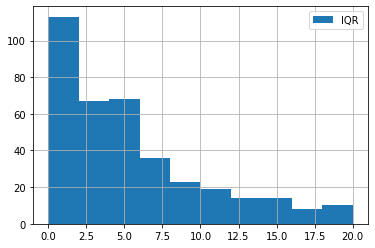

In [2057]:
check_for_outliers('absences',10)

Видно, что по формуле интерквартильного расстояния выбросами считаются все значения, превышающие 20. Но довольно много значений, не считая явных выбросов, которые выглядят вполне приемлемо, так что вместо формулы воспользуемся здравым смыслом. Отфильтруем данные и оставим те, где значение absences в пределах 50.

In [2058]:
df = df[df.absences < 50]

### Целевая переменная score

Описание: баллы по госэкзамену по математике. Посмотрим на распределение данных.

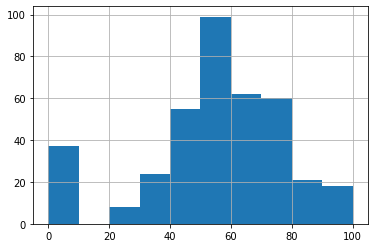

In [2059]:
df.score.hist()

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


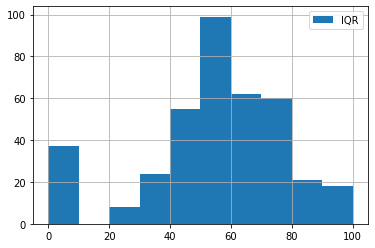

In [2060]:
check_for_outliers('score',10)

Выбросов у нас нет, пропуски мы убрали в самом начале. Распределение похоже на нормальное.

## Обработка упорядоченных категориальных признаков

Наконец, обработаем упорядоченные категориальные признаки. Их всего 9 - Medu, Fedu, studytime, failures, traveltime, famrel, freetime, goout, health.

### Столбец Medu

Описание: образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее).

In [2061]:
n_medu = df.Medu.nunique()
df.Medu.value_counts(dropna = False)

4.0    131
2.0     98
3.0     93
1.0     56
0.0      3
NaN      3
Name: Medu, dtype: int64

У нас всего **3 пропуска**. Прежде чем заполнить, посмотрим на распределение.

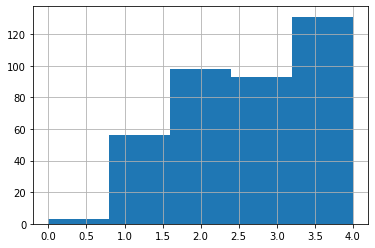

In [2062]:
df.Medu.hist(bins = n_medu)

Заметен тренд на возрастание - больше всего в данных матерей с высшим образованием. Выбросов, противоречащих логике и области определения, нет. Заполним пропуски медианным значением.

In [2063]:
def fill_na_with_median(column):
    median = df[column].median()
    df[column] = df[column].apply(lambda x: x if x == x else median)
    display(df[column].value_counts(dropna = False))

In [2064]:
fill_na_with_median('Medu')

4.0    131
2.0     98
3.0     96
1.0     56
0.0      3
Name: Medu, dtype: int64

### Столбец Fedu

Описание: образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее). Аналогичную обработку применим и для признака Fedu.

In [2065]:
n_fedu = df.Fedu.nunique()
df.Fedu.value_counts(dropna = False)

2.0     103
3.0      91
4.0      88
1.0      75
NaN      24
0.0       2
40.0      1
Name: Fedu, dtype: int64

В данных **24 пропуска**. Заполним пропуски медианой.

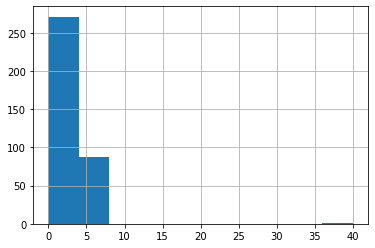

In [2066]:
df.Fedu.hist()

In [2067]:
fill_na_with_median('Fedu')

2.0     103
3.0      91
4.0      88
1.0      75
2.5      24
0.0       2
40.0      1
Name: Fedu, dtype: int64

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


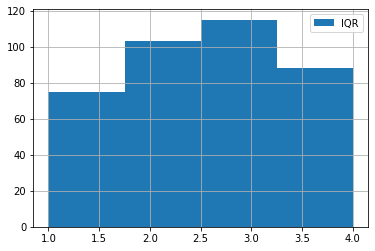

In [2068]:
check_for_outliers('Fedu',n_fedu - 2)

Из соображений логики лучше оставить значение 0, так как иначе мы совсем не учтем отцов, не имеющих образования, но есть явный выброс - значение 40. Скорее всего, это ошибка при заполнении и скорее всего, правильное значение 4, но точно знать мы не можем, поэтому отфильтруем датасет без этого выброса.

In [2069]:
df = df.loc[df.Fedu <= 4.0]

### Столбец traveltime

Описание: время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.).

In [2070]:
df.traveltime.value_counts(dropna = False)

1.0    235
2.0     93
NaN     28
3.0     20
4.0      7
Name: traveltime, dtype: int64

Выбросов, противоречащих логике и здравому смыслу, нет. Заполним пропуски медианой (**28 пропусков**).

In [2071]:
fill_na_with_median('traveltime')

1.0    263
2.0     93
3.0     20
4.0      7
Name: traveltime, dtype: int64

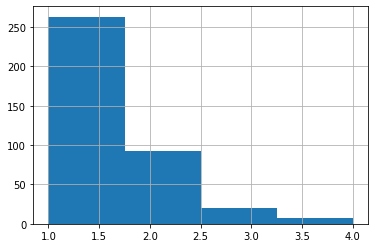

In [2072]:
df.traveltime.hist(bins = 4)

В основной своей массе ученикам недалеко добираться до школы.

### Столбец studytime

Описание: время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов). Посмотрим на сами данные.

In [2073]:
df.studytime.value_counts(dropna = False)

2.0    184
1.0    103
3.0     62
4.0     27
NaN      7
Name: studytime, dtype: int64

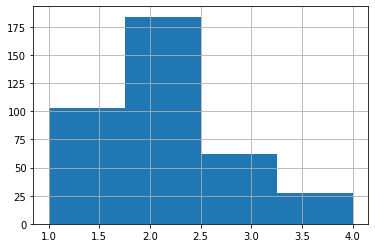

In [2074]:
df.studytime.hist(bins = 4)

Пропусков **всего 7**, выбросов, противоречащих логике - нет, распределение похоже на нормальное. Заполним пропуски медианой.

In [2075]:
fill_na_with_median('studytime')

2.0    191
1.0    103
3.0     62
4.0     27
Name: studytime, dtype: int64

### Столбец famrel

Описание: семейные отношения (от 1 - очень плохо до 5 - очень хорошо). Посмотрим на данные.

In [2076]:
df.famrel.value_counts(dropna = False)

 4.0    177
 5.0     94
 3.0     62
 NaN     26
 2.0     16
 1.0      7
-1.0      1
Name: famrel, dtype: int64

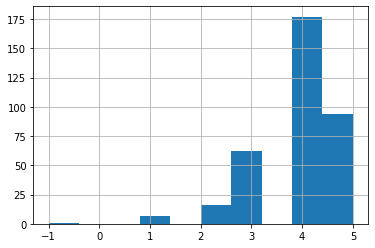

In [2077]:
df.famrel.hist()

В данных есть **27 пропусков**, которые можно заполнить медианным значением. Но в данных есть явный выброс - некорректное значение "-1". Избавимся от него.

In [2078]:
df = df[(df.famrel > 0) | (df.famrel != df.famrel)] #убираем выброс "-1"
fill_na_with_median('famrel')

4.0    203
5.0     94
3.0     62
2.0     16
1.0      7
Name: famrel, dtype: int64

В основной массе отношения в семьях учеников хорошие или отличные.

### Столбец freetime

Описание: свободное время после школы (от 1 - очень мало до 5 - очень много). Посмотрим на сами данные.

In [2079]:
df.freetime.value_counts(dropna = False)

3.0    150
4.0    110
2.0     61
5.0     36
1.0     17
NaN      8
Name: freetime, dtype: int64

В данных нет выбросов, противоречащих логике и здравому смыслу. Заполним **пропуски (11)** медианой и посмотрим на распределение.

In [2080]:
fill_na_with_median('freetime')

3.0    158
4.0    110
2.0     61
5.0     36
1.0     17
Name: freetime, dtype: int64

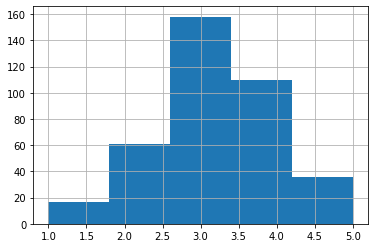

In [2081]:
df.freetime.hist(bins = 5)

Распределение похоже на нормальное, выбросов нет.

### Столбец goout

Описание: проведение времени с друзьями (от 1 - очень мало до 5 - очень много). Посмотрим на данные.

In [2082]:
df.goout.value_counts(dropna = False)

3.0    124
2.0     99
4.0     80
5.0     51
1.0     21
NaN      7
Name: goout, dtype: int64

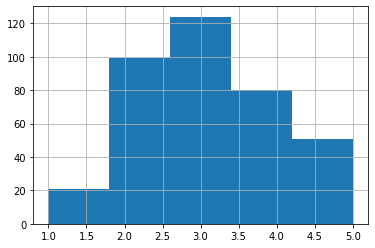

In [2083]:
df.goout.hist(bins = 5)

Распределение похоже на нормальное, выбросов нет. Заполним пропуски (**8 штук**) медианой.

In [2084]:
fill_na_with_median('goout')

3.0    131
2.0     99
4.0     80
5.0     51
1.0     21
Name: goout, dtype: int64

### Столбец health

Описание: текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо). Посмотрим на наши данные.

In [2085]:
df.health.value_counts(dropna = False)

5.0    134
3.0     87
4.0     58
1.0     46
2.0     42
NaN     15
Name: health, dtype: int64

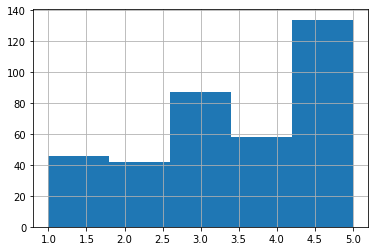

In [2086]:
df.health.hist(bins = 5)

У нас нет противоречащих логике выбросов, есть 15 пропусков, заполним их медианой. По распределению заметен тренд на возрастание - в большей массе у учеников все отлично со здоровьем.

In [2087]:
fill_na_with_median('health')

5.0    134
3.0     87
4.0     73
1.0     46
2.0     42
Name: health, dtype: int64

### Столбец failures

Описание: количество внеучебных неудач (n, если 1<=n<3, иначе 0). Посмотрим на данные.

In [2088]:
df.failures.value_counts(dropna = False)

0.0    285
1.0     48
NaN     22
3.0     14
2.0     13
Name: failures, dtype: int64

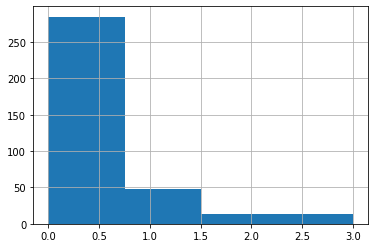

In [2089]:
df.failures.hist(bins = 4)

У нас нет противоречащих логике выбросов, есть 22 пропуска, заполним их медианой. По распределению заметен тренд на убывание - у большей части учеников не было внеучебных неудач.

In [2090]:
fill_na_with_median('failures')

0.0    307
1.0     48
3.0     14
2.0     13
Name: failures, dtype: int64

## Столбец studytime,granular

По логике этот столбец как-то связан со столбцом studytime. Посмотрим на данные, на распределение, заполним пропуски медианой, аналогично studytime и посмотрим на корреляцию этих признаков.

In [2091]:
df['studytime, granular'].value_counts(dropna = False)

-6.0     184
-3.0     102
-9.0      62
-12.0     27
 NaN       7
Name: studytime, granular, dtype: int64

Пропусков в данных не так уж и много - **всего 7**.

In [2092]:
fill_na_with_median('studytime, granular')

-6.0     191
-3.0     102
-9.0      62
-12.0     27
Name: studytime, granular, dtype: int64

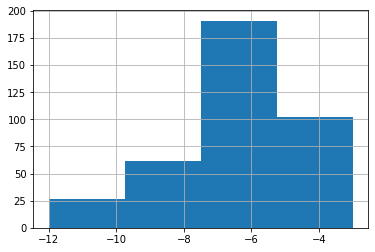

In [2093]:
df['studytime, granular'].hist(bins = 4)

Посмотрим на значения столбца studytime

In [2094]:
df.studytime.value_counts()

2.0    191
1.0    102
3.0     62
4.0     27
Name: studytime, dtype: int64

Предположительно **studytime,granular = studytime * -3**. Проверим корреляцию этих двух столбцов.

In [2095]:
studytime = df[['studytime, granular','studytime']]
studytime.corr()

,"studytime, granular",studytime
"studytime, granular",1.0,-1.0
studytime,-1.0,1.0


Видим абсолютную корреляцию, догадка подтвердилась, можем удалить столбец studytime, granular.

In [2096]:
df.drop(columns = ['studytime, granular'], axis = 1,inplace = True)

## Корреляция признаков

Итак, мы уже удалили признак 'studytime,granular', сильно скоррелированный с признаком 'studytime'. Теперь посмотрим на корреляцию остальных признаков.

In [2097]:
df_corr = df.corr()
df_corr[df_corr > 0.5]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
school,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
address,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.605455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fedu,NaN,NaN,NaN,NaN,NaN,NaN,0.605455,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
traveltime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
studytime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Из данных видно, что корреляция больше 0.5 есть только у признаков Medu и Fedu. Попробуем из этих двух признаков сделать один.

In [2098]:
df['Pedu'] = (df.Medu + df.Fedu) / 2 # складываем и усредняем обозначения образования родителей

Удалим признаки, из которых мы сделали один.

In [2099]:
columns = ['Medu','Fedu']
df = df.drop(columns = columns, axis = 1)

In [2100]:
df.head()

,school,sex,age,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score,Pedu
0,1,1,18,1.0,1.0,0.0,at_home,teacher,course,mother,2.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0,3.0,4.0,3.0,6.0,30.0,4.0
1,1,1,17,1.0,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,5.0,3.0,3.0,3.0,4.0,30.0,1.0
2,1,1,15,1.0,0.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0,3.0,2.0,3.0,10.0,50.0,1.0
3,1,1,15,1.0,1.0,1.0,health,other,home,mother,1.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,5.0,2.0,75.0,3.0
4,1,1,16,1.0,1.0,1.0,other,other,home,father,1.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,4.0,3.0,2.0,5.0,4.0,50.0,3.0


## Тест Стьюдента на значимость признаков

После того как мы заполнили пропуски, удалили выбросы,разобрались с признаками с сильной и умеренно-сильной корреляцией, посмотрим, какие признаки тест Стьюдента пометит как важные для будущей модели.

In [2101]:
columns = df.drop(columns = ['score'], axis = 1).columns

for col in columns:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки absences
Найдены статистически значимые различия для колонки Pedu


Итак, оставим только значимые по тесту Стьюдента признаки.

In [2102]:
columns = ['sex','address','Mjob','failures','schoolsup','paid','higher','romantic','absences','Pedu','score']

df = df[columns]
df.shape

(382, 11)

## Выводы

Итак, в результате EDA для анализа влияния условий жизни учащихся на их успевамость по математике, были получены следующие выводы:

- В данных много столбцов с пропусками, но в самих столбцах достаточно мало пустых значений, наибольшее количество пропусков (в столбце Pstatus) составляет 11%.
- Строк без пропусков всего 97, что составляет около 25% данных. По некоторым источникам, в таком случае наиболее хорошо подходят методы заполнения пропусков, основанные на статистических методах, поэтому пропуски заполнялись модой (для номинативных) и медианой (для числовых).
- Выбросов немного и они найдены только в столбцах Fedu (образование отца), famrel (отношения в семье) и absences (количество пропущенных занятий), что позволяет сделать вывод о том, что данные достаточно чистые.
- Между признаками studytime и studytime,granular была обнаружена полная корреляция. Очевидно, столбец studytime,granular был получен умножением значений из столбца studytime на -3. Из этих двух признаков был оставлен studytime.
- Между признаками Medu и Fedu была обнаружена умеренная корреляция, между остальными признаками - слабая корреляция. Из признаков Medu и Fedu был сформирован признак Pedu - усредненное значение по сумме обозначений образования родителей.
- Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это sex, address, Mjob, failures, schoolsup, paid, higher, romantic, absences, Pedu и целевая переменная score.

## Построение регрессии

Последним пунктом подготовки данных - сделаем новые переменные из признака Mjob с помощью get_dummies.

In [2104]:
new_columns = pd.get_dummies(df.Mjob, prefix='Mjob')
df = pd.concat([df, new_columns],axis = 1)
df.shape

(382, 16)

Наконец, удалим признак Mjob, и подготовим данные для построения линейной регрессии.

In [2105]:
df = df.drop(columns = ['Mjob'], axis = 1)
df.shape

(382, 15)

Импортируем нужные библиотеки

In [2110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
import numpy as np

Реализуем функцию, выводящую метрики для линейной регрессии - Mean Squared Error и Root Mean Square Error.

In [2112]:
def print_regression_metrics(y_true, y_pred): # вывод метрик регрессии
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f'MSE = {mse:.2f}, RMSE = {rmse:.2f}')

Наконец, разделим данные на тестовые и тренировочные, и обучим модель.

In [2113]:
X = df.drop(columns = ['score'], axis=1).values
y = df['score'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
# нормализация с помощью статистических методов, устойчивых к выбросам
scaler = RobustScaler()
# нормализуем отдельно тестовую и обучающую выборку
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)
lr = LinearRegression() 
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [2114]:
print_regression_metrics(y_test,y_pred)

MSE = 574.88, RMSE = 23.98


RMSE можно интерпретировать как отклонение примерно в 24 балла, что довольно много для 100-балльной шкалы. Возможно, для улучшения модели необходимо добавить какие-либо нелинейности из комбинации признаков, или посмотреть влияние добавления\удаления признаков из модели на RMSE.